In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\sofronics\Datasets\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

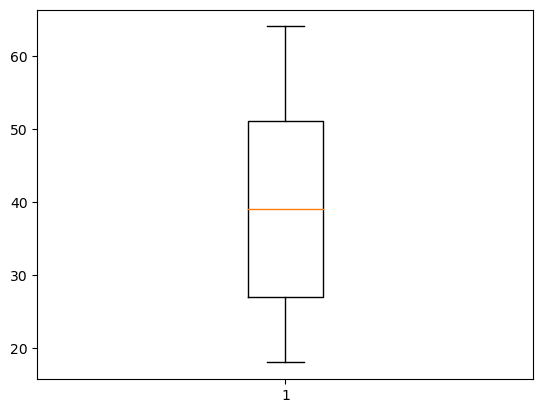

In [11]:
plt.boxplot(df['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

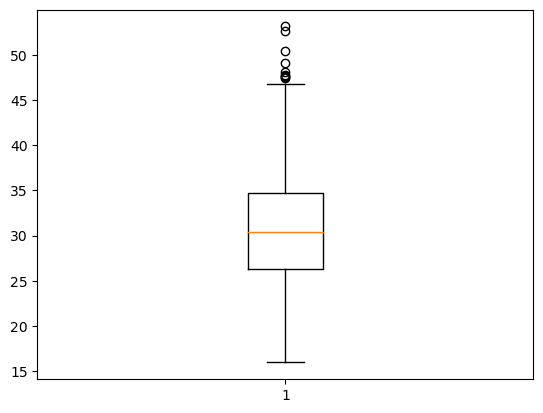

In [12]:
plt.boxplot(df['bmi'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

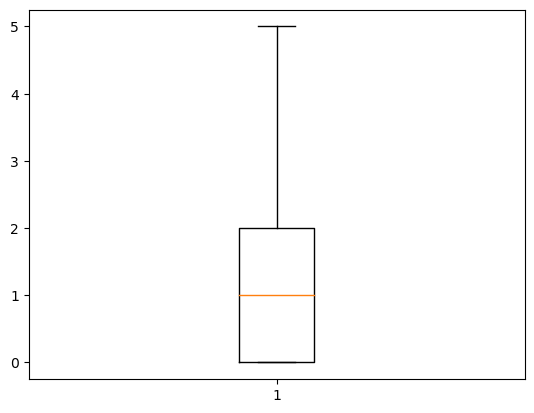

In [13]:
plt.boxplot(df['children'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

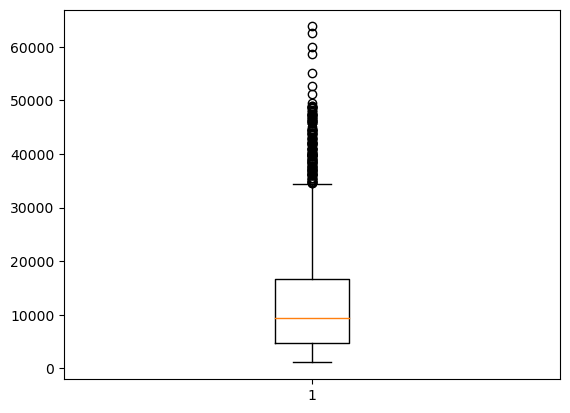

In [14]:
plt.boxplot(df['charges'])
plt.show

In [15]:
def remove_outliers(d,c):
  
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr(inter quantile range)
    iqr=q3-q1
    
    #find upper bound(ub)and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    #filter good data(ie eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier
    

<function matplotlib.pyplot.show(close=None, block=None)>

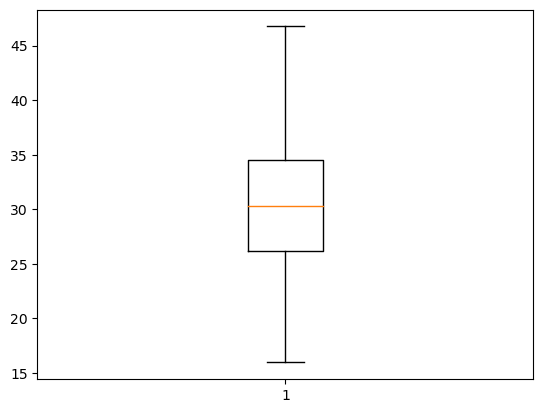

In [16]:
df=remove_outliers(df,'bmi')
plt.boxplot(df['bmi'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

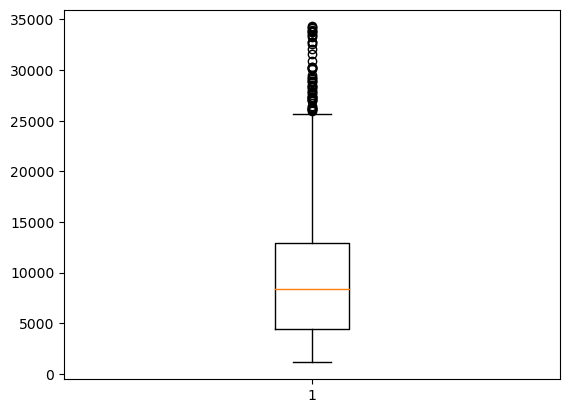

In [17]:
df=remove_outliers(df,'charges')
plt.boxplot(df['charges'])
plt.show

In [18]:
df.shape

(1190, 7)

In [19]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

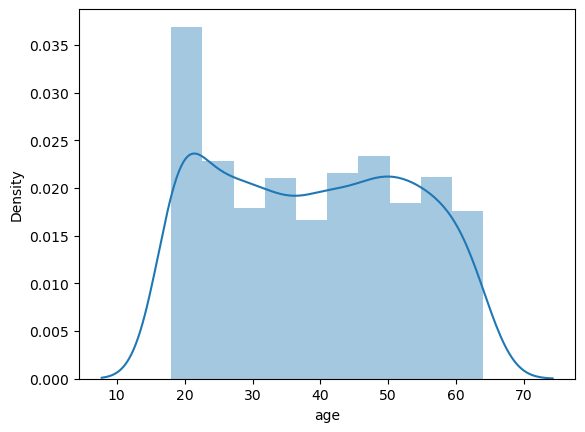

In [20]:
sns.distplot(df['age'])

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

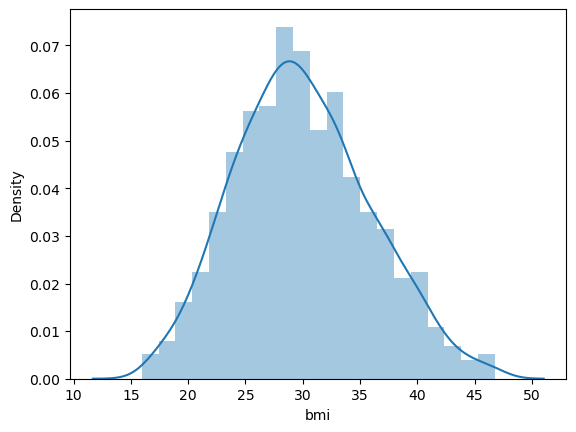

In [21]:
sns.distplot(df['bmi'])

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

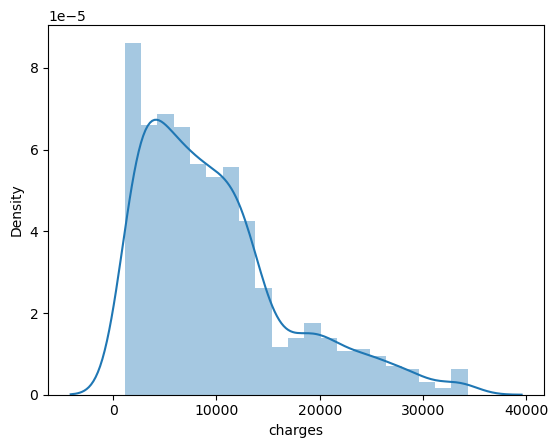

In [22]:
sns.distplot(df['charges'])

<Axes: xlabel='children'>

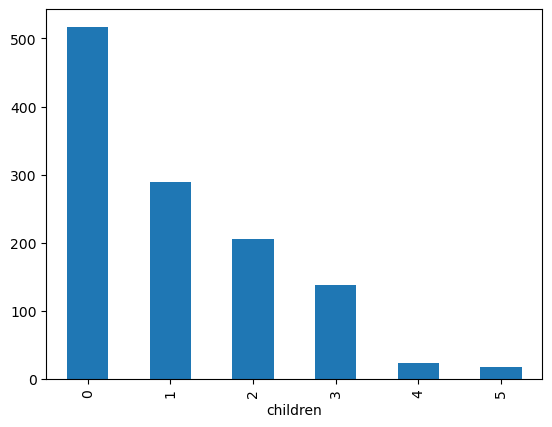

In [23]:
df.groupby('children')['children'].count().plot(kind='bar')

In [26]:
df=df.drop(['sex','region'],axis=1)

In [27]:
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [40]:
dff=df.drop(['children'],axis=1)
dff.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [43]:
df_numeric=dff.drop('smoker',axis=1)

<Axes: >

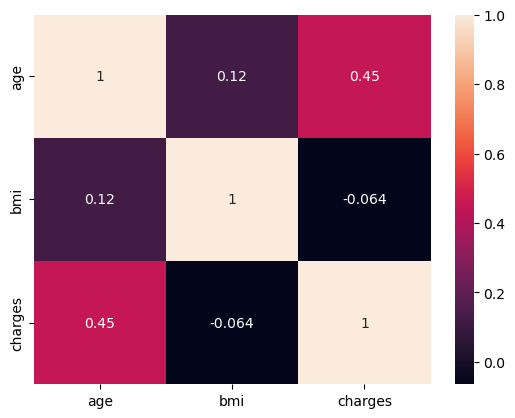

In [44]:
sns.heatmap(df_numeric.corr(),annot=True)

In [37]:
df.dtypes

age           int64
bmi         float64
children      int64
smoker       object
charges     float64
dtype: object

In [39]:
dfdummy=pd.get_dummies(df['smoker'],drop_first=True)
dfdummy.head()

,yes
0,True
1,False
2,False
3,False
4,False


In [47]:
df_final=pd.concat([df_numeric,dfdummy],axis=1)

In [48]:
df_final.head()

,age,bmi,charges,yes
0,19,27.900,16884.92400,True
1,18,33.770,1725.55230,False
2,28,33.000,4449.46200,False
3,33,22.705,21984.47061,False
4,32,28.880,3866.85520,False


In [49]:
x=df_final.drop('charges',axis=1)
y=df_final['charges']

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [51]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(833, 3) (357, 3) (833,) (357,)


In [52]:
from sklearn.feature_selection import SelectKBest, f_regression

key_features=SelectKBest(score_func=f_regression,k=5)#to select 5 significant features

xtrain_selected=key_features.fit_transform (xtrain,ytrain)

selected_indices=key_features.get_support(indices=True)

selected_features=xtrain.columns[selected_indices]

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


In [53]:
selected_features

Index(['age', 'bmi', 'yes'], dtype='object')

In [54]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(xtrain_selected ,ytrain)

linreg.score(xtrain_selected,ytrain)

0.5740810899419866

In [55]:
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6369761157191722

In [58]:
predicted_charges=linreg.predict(xtest_selected)

linreg.score(xtest_selected,ytest)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6369761157191722

In [59]:
predicted_charges

array([ 9049.84446945,  6995.60384832,  3589.85023618,  3665.51616622,
        9750.08598614, 10258.47654   , 10526.89884179, 23932.08818672,
       11858.17860934,  8047.98448779,  7313.21878357,  4518.00999642,
       24451.60829566, 21972.00360158, 10614.61478034, 14187.09664987,
       19666.2576024 , 10979.4265514 ,  7656.44674003, 13884.37275165,
       22992.11605357,  9631.89011117,  3533.08950526, 13082.41462378,
        8776.05741444, 12530.15857838,  9788.81683782,  4139.85028153,
        9645.23805501,  3762.79599989, 11607.33348232, 27129.51157225,
        6222.34492804,  5099.6179782 ,  3826.22694159, 10241.55961627,
       12298.6788772 , 13833.62198048, 12487.66624474,  3168.71539416,
        9236.59088145, 17454.66011694,  4346.62989268,  3613.67500631,
       10865.23731626,  3662.64504867,  9417.0896981 ,  4114.47489594,
        6235.93802976,  5865.76902775, 10979.86421134, 12654.59452645,
        8469.12685207, 11117.64058099, 19503.55855162,  3652.16822238,
      

In [60]:
linreg.intercept_

-2556.86011238229

In [61]:
linreg.coef_

array([  245.95564504,    44.51822033, 14121.9101254 ])